# Titanic Notebook
 
 This dataset contains information about the 891 passensger on-board the Titanic.

- **PassensgerId**: ID assigned to the passenger 
- **Pclass**: The class of the ticket
- **Name**: The name of the passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings accompanying the passenger
- **Parc**: Number of parents and children accompanying the passenger
- **Ticket**: Ticket number of passenger
- **Fare**: Fare paid for trip
- **Cabin**: Cabin ID assigned to the passenger
- **Embarked**: Port at which passenger embarked. Queenstown, Cherbourg, and Southampton
- **Survived**: 1 or 0 is the passenger survived or died, respectively

## Exploratory Data Analysis for Numerical Data

In [14]:
# Import libraries
import pandas as pd 
import numpy as np # computing values in multi-dimensional data structures
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # further visualization

# Will allow embedding visualization in Jupyter
%matplotlib inline

In [10]:
# Import the data as a Pandas DataFrame
titanicDf = pd.read_csv('./titanic.csv')

In [11]:
# Preview the data
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Here we see that all passengers' names are known but some have missing info for age.
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# We want to first explore Numerical features so we'll drop Categorical feats.
categoricalFeats = ['Pclass','Name','Sex','PassengerId','Ticket','Cabin','Embarked']

# Drop these categorical columns
# axis=0 for rows, axis=1 for columns.
# inplace, if True, will modify the dataframe directly.
titanicDf.drop(categoricalFeats, axis=1, inplace=True)

In [5]:
# Make sure you have the right columns
titanicDf.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [6]:
# .info() will show 
#   (a) the data types for each column and 
#   (b) the number of values in each column
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [7]:
# .describe()
# Can be used for summary (prelimenary) statistics
titanicDf.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# .groupBy() will divide the data by some criteria
# .mean() will compute the mean
titanicDf.groupby('Survived').mean()

,Age,SibSp,Parch,Fare
Survived,,,,
0,30.626179,0.553734,0.329690,22.117887
1,28.343690,0.473684,0.464912,48.395408


In [9]:
# titanicDf['Age'].isnull() will label cells as True or False if the cell is null or not null, respecticely.
titanicDf.groupby( titanicDf['Age'].isnull() ).mean()

,Survived,Age,SibSp,Parch,Fare
Age,,,,,
False,0.406162,29.699118,0.512605,0.431373,34.694514
True,0.293785,NaN,0.564972,0.180791,22.158567


In [17]:
# Import Titanic again
titanicDf = pd.read_csv('./titanic.csv')
# This time include Pclass.
categoricalFeats = ['Name','Sex','PassengerId','Ticket','Cabin','Embarked']
titanicDf.drop(categoricalFeats, axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

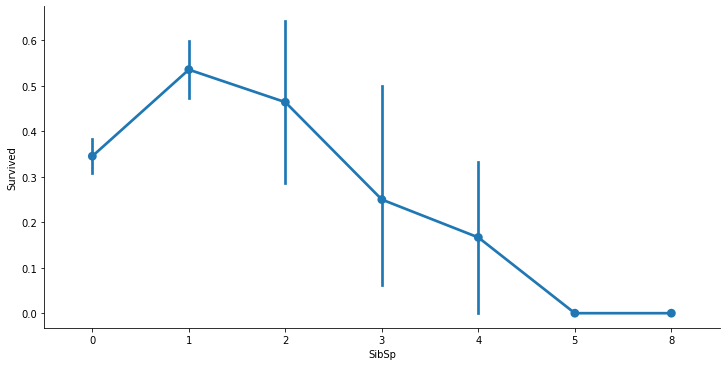

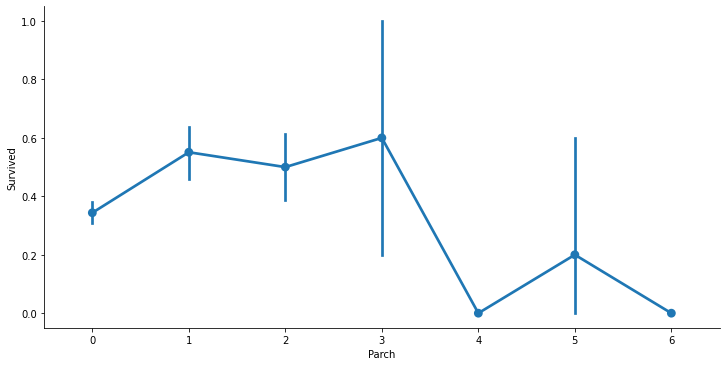

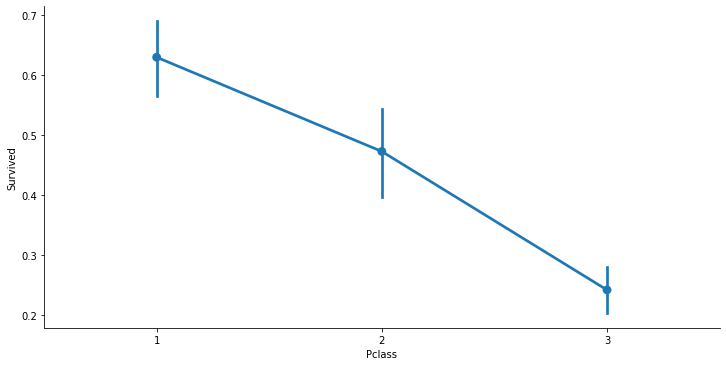

In [18]:
# Generate two plots:
for i, col in enumerate(['SibSp','Parch','Pclass']):

    # embed a plot inside the notebook
    plt.figure(i)

    # plot for categorical data
    sns.catplot(x=col, y='Survived', data=titanicDf, kind='point', aspect=2,)